## Data Loading

In [ ]:
!wget http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz

from collections import Counter

!tar -xf Stsbenchmark.tar.gz

import pandas as pd
import csv
import numpy as np

train=pd.read_csv("stsbenchmark/sts-train.csv",sep="\t",names="genre     file    years   number   score  sentence1 sentence2".split())
test=pd.read_csv("stsbenchmark/sts-test.csv",sep="\t",names="genre     file    years   number   score  sentence1 sentence2".split(),error_bad_lines=False,quoting=csv.QUOTE_NONE, encoding='utf-8')
dev=pd.read_csv("stsbenchmark/sts-dev.csv",sep="\t",names="genre     file    years   number   score  sentence1 sentence2".split(),error_bad_lines=False)
print(train.shape, test.shape, dev.shape)
train = train.dropna()
test = test.dropna()
dev = dev.dropna()
print(train.shape, test.shape, dev.shape)

train["genre"].unique()

train.score.value_counts()

#temp = train[train["genre"]=="main-forums"]
#temp[temp["label"]==1]

def convert_to_score(x):
  if x<=2.0:
    return 0
  elif x>2.0 and x<=3.0:
    return 1
  else:
    return 2

train["label"]=train["score"].apply(convert_to_score)
test["label"]=test["score"].apply(convert_to_score)
dev["label"]=dev["score"].apply(convert_to_score)

test = test.filter(["sentence1","sentence2","label","genre"])
train = train.filter(["sentence1","sentence2","label","genre"])
dev = dev.filter(["sentence1","sentence2","label","genre"])

train["genre"] = train["genre"].apply(lambda x : x if x!="main-forum" else "main-forums")

train["genre"].unique()

test


--2021-11-30 05:36:39--  http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz
Resolving ixa2.si.ehu.es (ixa2.si.ehu.es)... 158.227.106.100
Connecting to ixa2.si.ehu.es (ixa2.si.ehu.es)|158.227.106.100|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://ixa2.si.ehu.eus/stswiki/images/4/48/Stsbenchmark.tar.gz [following]
--2021-11-30 05:36:39--  http://ixa2.si.ehu.eus/stswiki/images/4/48/Stsbenchmark.tar.gz
Resolving ixa2.si.ehu.eus (ixa2.si.ehu.eus)... 158.227.106.100
Connecting to ixa2.si.ehu.eus (ixa2.si.ehu.eus)|158.227.106.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409630 (400K) [application/x-gzip]
Saving to: ‘Stsbenchmark.tar.gz’

Stsbenchmark.tar.gz 100%[===================>] 400.03K   542KB/s    in 0.7s    

2021-11-30 05:36:41 (542 KB/s) - ‘Stsbenchmark.tar.gz’ saved [409630/409630]

(5711, 7) (1379, 7) (1470, 7)
(5708, 7) (1379, 7) (1468, 7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence1,sentence2,label,genre
0,A girl is styling her hair.,A girl is brushing her hair.,1,main-captions
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,2,main-captions
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,2,main-captions
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,2,main-captions
4,A man is playing a harp.,A man is playing a keyboard.,0,main-captions
...,...,...,...,...
1374,"Philippines, Canada pledge to further boost re...",Philippines saves 100 after ferry sinks,0,main-news
1375,Israel bars Palestinians from Jerusalem's Old ...,"Two-state solution between Palestinians, Israe...",0,main-news
1376,How much do you know about Secret Service?,Lawmakers from both sides express outrage at S...,0,main-news
1377,Obama Struggles to Soothe Saudi Fears As Iran ...,Myanmar Struggles to Finalize Voter Lists for ...,0,main-news


In [ ]:
"""
train["joint"] =  train["sentence1"]+ " " + train["sentence2"]
test["joint"] =  test["sentence1"]+" " +test["sentence2"]
dev["joint"] =  dev["sentence1"]+" " +dev["sentence2"]

train["joint"]

from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

>>> text_clf_tfidf = Pipeline([
...     ('vect', CountVectorizer()),
...     ('tfidf', TfidfTransformer()),
...     ('clf', MultinomialNB()),
... ])

>>> from sklearn.pipeline import Pipeline
>>> text_clf = Pipeline([
...     ('vect', CountVectorizer()),
...     ('clf', MultinomialNB()),
... ])

test.genre.unique()

train_domain="main-forums"
test_domain="main-forums"

new_train = train[train.genre==train_domain]
new_train[new_train["sentence2"].isna()]

new_train = train[train.genre==train_domain]
new_test = test[test.genre==test_domain]
#new_dev = dev[dev.genre==domain]
print(new_train.shape, new_test.shape)
text_clf.fit(new_train["joint"],new_train["label"])
text_clf_tfidf.fit(new_train["joint"],new_train["label"])
from sklearn.metrics import f1_score
new_test["joint"]
print("BoW, NB\t",f1_score(new_test["label"],text_clf.predict(new_test["joint"]),average="weighted")*100)
print("BoW, Tf-IDF, NB\t",f1_score(new_test["label"],text_clf_tfidf.predict(new_test["joint"]),average="weighted")*100)

text_clf.fit(new_train["joint"],new_train["label"])

train_domain="main-captions"
test_domain="main-forums"

for train_domain in ['main-captions', 'main-forums', 'main-news']:
  d1={}
  d2={}
  z=[]
  print(train_domain)
  for test_domain in ['main-captions', 'main-forums', 'main-news']:
    #print(train_domain, test_domain)
    new_train = train[train.genre==train_domain]
    new_test = test[test.genre==test_domain]
    #new_dev = dev[dev.genre==domain]
    #print(new_train.shape, new_test.shape)
    text_clf.fit(new_train["joint"],new_train["label"])
    text_clf_tfidf.fit(new_train["joint"],new_train["label"])
    new_test["joint"]
    x=f1_score(new_test["label"],text_clf.predict(new_test["joint"]),average="weighted")*100
    y=f1_score(new_test["label"],text_clf_tfidf.predict(new_test["joint"]),average="weighted")*100
    #z = f1_score(new_test["label"],Counter(new_test["joint"])).most_common[0],average="weighted")*100
    d1[test_domain] = x
    d2[test_domain] = y
    #print("BoW, NB\t",train_domain, test_domain, "\t",f1_score(new_test["label"],text_clf.predict(new_test["joint"]),average="weighted")*100)
    #print("BoW, Tf-IDF, NB\t",train_domain, test_domain, "\t",f1_score(new_test["label"],text_clf_tfidf.predict(new_test["joint"]),average="weighted")*100)
    print(test_domain)
    print("True", Counter(new_test["label"]).most_common(3))
    print("Predict", Counter(text_clf.predict(new_test["joint"])).most_common(3))
    print("Predict tfidf", Counter(text_clf_tfidf.predict(new_test["joint"])).most_common(3))
    z.append(100* f1_score(new_test["label"],[Counter(new_train["label"]).most_common(3)[0][0]]*new_test.shape[0],average="weighted"))
  print(d1)
  print(d2)
  print(z)  
  print("\n")

Counter(new_test["label"])

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

#lr = LogisticRegression.

>>> from sklearn.pipeline import Pipeline
>>> text_clf = Pipeline([
...     ('vect', CountVectorizer()),
...     ('clf', LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)),
#...     ('clf', SGDClassifier(loss="log",alpha=1e-3,max_iter=200)),
... ])

>>> text_clf_tfidf = Pipeline([
...     ('vect', CountVectorizer()),
...     ('tfidf', TfidfTransformer()),
#...     ('clf', SGDClassifier(loss="log",alpha=1e-3,max_iter=200)),
...     ('clf', LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)),
... ])

#CountVectorizer.fit(new_train["joint"],new_train["label"])

train_domain="main-captions"
test_domain="main-forums"

for train_domain in ['main-captions', 'main-forums', 'main-news']:
  d1={}
  d2={}
  z=[]
  print(train_domain)
  for test_domain in ['main-captions', 'main-forums', 'main-news']:
    #print(train_domain, test_domain)
    new_train = train[train.genre==train_domain]
    new_test = test[test.genre==test_domain]
    #new_dev = dev[dev.genre==domain]
    #print(new_train.shape, new_test.shape)
    text_clf.fit(new_train["joint"],new_train["label"])
    text_clf_tfidf.fit(new_train["joint"],new_train["label"])
    new_test["joint"]
    x=f1_score(new_test["label"],text_clf.predict(new_test["joint"]),average="weighted")*100
    y=f1_score(new_test["label"],text_clf_tfidf.predict(new_test["joint"]),average="weighted")*100
    #z = f1_score(new_test["label"],Counter(new_test["joint"])).most_common[0],average="weighted")*100
    d1[test_domain] = x
    d2[test_domain] = y
    #print("BoW, NB\t",train_domain, test_domain, "\t",f1_score(new_test["label"],text_clf.predict(new_test["joint"]),average="weighted")*100)
    #print("BoW, Tf-IDF, NB\t",train_domain, test_domain, "\t",f1_score(new_test["label"],text_clf_tfidf.predict(new_test["joint"]),average="weighted")*100)
    print(test_domain)
    print("True", Counter(new_test["label"]).most_common(3))
    print("Predict", Counter(text_clf.predict(new_test["joint"])).most_common(3))
    print("Predict tfidf", Counter(text_clf_tfidf.predict(new_test["joint"])).most_common(3))
    z.append(100* f1_score(new_test["label"],[Counter(new_train["label"]).most_common(3)[0][0]]*new_test.shape[0],average="weighted"))
  print(d1)
  print(d2)
  print(z)  
  print("\n=========================================\n")


# >>> from sklearn.pipeline import Pipeline
>>> text_clf = Pipeline([
...     ('vect', CountVectorizer()),
...     ('clf', LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)),
... ])

>>> text_clf_tfidf = Pipeline([
...     ('vect', CountVectorizer()),
...     ('tfidf', TfidfTransformer()),
...     ('clf', LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)),
... ])
"""

'\ntrain["joint"] =  train["sentence1"]+ " " + train["sentence2"]\ntest["joint"] =  test["sentence1"]+" " +test["sentence2"]\ndev["joint"] =  dev["sentence1"]+" " +dev["sentence2"]\n\ntrain["joint"]\n\nfrom sklearn.feature_extraction.text import *\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import f1_score\nfrom sklearn.pipeline import Pipeline\n\n>>> text_clf_tfidf = Pipeline([\n...     (\'vect\', CountVectorizer()),\n...     (\'tfidf\', TfidfTransformer()),\n...     (\'clf\', MultinomialNB()),\n... ])\n\n>>> from sklearn.pipeline import Pipeline\n>>> text_clf = Pipeline([\n...     (\'vect\', CountVectorizer()),\n...     (\'clf\', MultinomialNB()),\n... ])\n\ntest.genre.unique()\n\ntrain_domain="main-forums"\ntest_domain="main-forums"\n\nnew_train = train[train.genre==train_domain]\nnew_train[new_train["sentence2"].isna()]\n\nnew_train = train[train.genre==train_domain]\nnew_test = test[test.genre==test_domain]\n#new_dev = dev[dev.genre==domain]\nprint(new_tra

## CNN Distance

In [ ]:
import numpy as np
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
from copy import deepcopy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from gensim.summarization import bm25
import nltk
import numpy as np
import random
import pickle
import scipy
import sklearn
import tqdm
import seaborn as sns
from __future__ import unicode_literals
import xml.etree.ElementTree as ET
import copy
from pprint import pprint
import numpy as np
import pandas as pd
import numpy as np
import re
import os
import re
import sys
import numpy as np
import pandas as pd
import sklearn
from collections import Counter
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
import gensim
from gensim.models import KeyedVectors
import nltk
#from nltk.corpus import stopwords
#stopword = stopwords.words('english')
import tensorflow as tf
import keras
from keras.models import Model,Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Bidirectional,TimeDistributed,Activation
#from keras.optimizers import Adam,RMSprop
from keras import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Input,Concatenate,Conv2D,Conv1D,MaxPooling1D,Multiply,Add,Dot,GlobalMaxPooling1D
from keras.layers import AlphaDropout,Reshape,Dropout,LSTM,Bidirectional,Lambda,CuDNNLSTM
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K
#from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from tensorflow.keras.utils import to_categorical
import networkx as nx
import matplotlib.pyplot as plt
#from wxconv import WXC
import sys
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
!wget https://nlp.stanford.edu/data/glove.840B.300d.zip
from zipfile import ZipFile
with ZipFile('glove.840B.300d.zip','r') as f:
  f.extractall()
  
!rm -rf glove.840B.300d.zip

embedding_index = {}
with open('glove.840B.300d.txt','r',encoding='utf-8') as f1:
  for line in f1.readlines():
    words = line.split(' ')
    word = words[0]
    embedding_vec = np.asarray(words[1:],dtype='float32')
    embedding_index[word] = embedding_vec
    
embedding_model=embedding_index

--2021-11-30 05:36:45--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-11-30 05:36:46--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip   6%[>                   ] 135.98M  5.00MB/s    eta 5m 27s ^C


BadZipFile: ignored

In [ ]:
embeddings_index=embedding_index

#### Example Train Test Domain

In [ ]:
train_domain='main-news'
test_domain='main-captions'

In [ ]:
train[train["genre"]==train_domain]

,sentence1,sentence2,label,genre
2447,The problem likely will mean corrective change...,He said the problem needs to be corrected befo...,2,main-news
2448,SEC Chairman William Donaldson said there is a...,I think there's a building confidence that the...,2,main-news
2449,Myanmar's pro-democracy leader Aung San Suu Ky...,Myanmar's pro-democracy leader Aung San Suu Ky...,2,main-news
2450,"Darren Dopp, a Spitzer spokesman, declined to ...","John Heine, a spokesman for the commission in ...",0,main-news
2451,"In afternoon trading in Europe, France's CAC-4...","In Europe, France's CAC-40 rose 1.3 percent, B...",0,main-news
...,...,...,...,...
5706,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia,0,main-news
5707,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...,0,main-news
5708,President heading to Bahrain,President Xi: China to continue help to fight ...,0,main-news
5709,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders,0,main-news


In [ ]:
train_sentences1 = train[train["genre"]==train_domain]["sentence1"]
train_sentences2 = train[train["genre"]==train_domain]["sentence2"]
trainlabels = train[train["genre"]==train_domain]["label"]

In [ ]:
test_sentences1 = test[test["genre"]==test_domain]["sentence1"]
test_sentences2 = test[test["genre"]==test_domain]["sentence2"]
testlabels = test[test["genre"]==test_domain]["label"]

In [ ]:
np.mean([len(i.split(" ")) for i in train_sentences1 ]),np.mean([len(i.split(" ")) for i in train_sentences2 ])

(11.374003678724709, 11.532495401594113)

In [ ]:
maxlen = 20
maxwords = 30000
embed_dim = 300

tok = Tokenizer(num_words=maxwords)
tok.fit_on_texts(train_sentences1+train_sentences2)
word_index = tok.word_index

embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
for word, i in word_index.items():
    if word in embeddings_index:
        embedding_vector = embeddings_index[word]
    embedding_matrix[i] = embedding_vector

NameError: ignored

In [ ]:
train_seq1 = tok.texts_to_sequences(train_sentences1)
trainind1 = pad_sequences(train_seq1,maxlen=maxlen)

test_seq1 = tok.texts_to_sequences(test_sentences1)
testind1 = pad_sequences(test_seq1,maxlen=maxlen)

train_seq2 = tok.texts_to_sequences(train_sentences2)
trainind2 = pad_sequences(train_seq2,maxlen=maxlen)

test_seq2 = tok.texts_to_sequences(test_sentences2)
testind2 = pad_sequences(test_seq2,maxlen=maxlen)


In [ ]:
train_to_categorical=to_categorical(trainlabels)
test_to_categorical=to_categorical(testlabels)

In [ ]:
def my_model():
  I1=Input(shape=(maxlen,))
  I2=Input(shape=(maxlen,))
  #embed_layer = Embedding(len(word_index)+1,embed_dim,weights=[embedding_matrix],trainable=False)
  embed_layer = Embedding(len(word_index)+1,embed_dim,trainable=False)
  conv_layer = Conv1D(128, 5, activation='relu')
  max_pool_layer = GlobalMaxPooling1D()
  dense_layer = Dense(25, activation='relu')
  r1 = embed_layer(I1)
  r2 = embed_layer(I2)

  c1 = conv_layer(r1)
  c2 = conv_layer(r2)

  c1 = max_pool_layer(c1)
  c2 = max_pool_layer(c2)

  c1 = dense_layer(c1)
  c2 = dense_layer(c2)
  subtracted =   keras.layers.Subtract()([c1, c2])
  absvalue  = Lambda(lambda x: tf.norm(x,axis=1))(subtracted)
  #absvalue  = Lambda(lambda x: K.sqrt(K.sum(x**2,axis=-1)))(subtracted)
  o = Activation("sigmoid")(absvalue)
  return Model(inputs=[I1,I2],outputs=[o])

In [ ]:
import keras

In [ ]:
model = my_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 20, 300)      3511500     ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 16, 128)      192128      ['embedding[0][0]',          

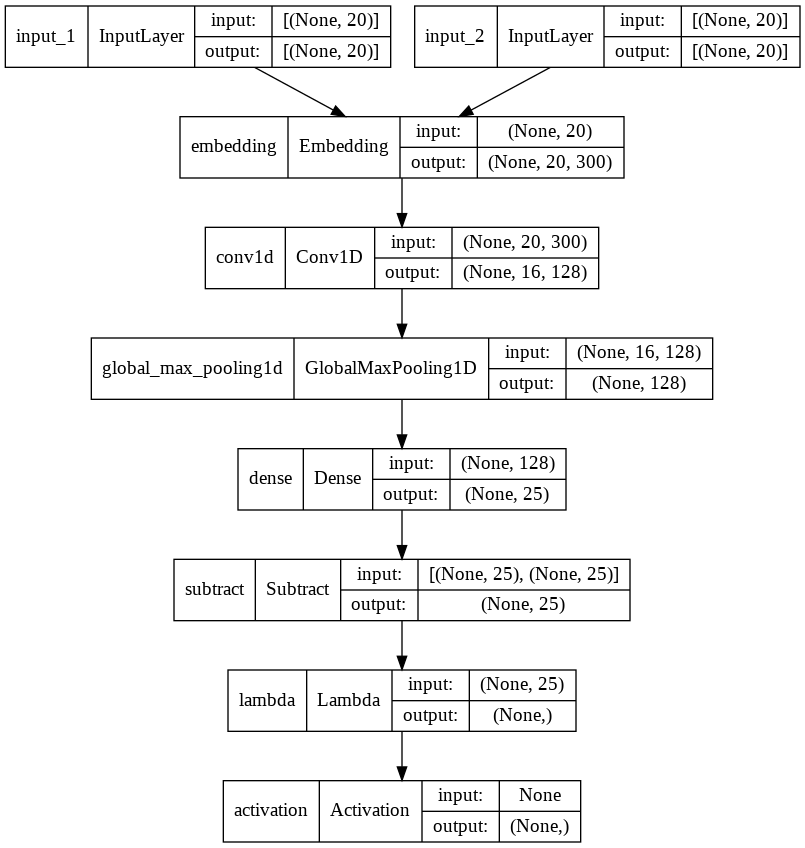

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
newtrainlabels = [0.5 if i == 1 else i for i in trainlabels]
newtrainlabels = np.array([1 if i == 2 else i for i in newtrainlabels])# from 0,1,2 to 0,0.5,1

In [ ]:
newtestlabels = [0.5 if i == 1 else i for i in testlabels]
newtestlabels = np.array([1 if i == 2 else i for i in newtestlabels])

In [ ]:
model = my_model()
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007),metrics=['mse'])
modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
history=model.fit([trainind1,trainind2],newtrainlabels,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint],epochs=40)

In [ ]:
def round(list_of_outputs):# from 0 to 1 to 0,1,2
  ls =[]
  for i in list_of_outputs:
    if i <0.25:
      l = 0
    elif i >= 0.75:
      l = 2
    else:
      l= 1
    ls.append(l)
  return np.array(ls)

In [ ]:
def return_f1(data,labels,model=model):
  raw_pred = np.nan_to_num(model.predict(data))
  pred = round(raw_pred)
  return f1_score(list(labels),pred,average="weighted")

In [ ]:
return_f1([trainind1,trainind2],trainlabels), return_f1([testind1,testind2],testlabels)

#### In LOOP: all train and test domains

In [ ]:
train_domain='main-captions'
test_domain='main-captions'

In [ ]:
for train_domain in ['main-captions', 'main-forums', 'main-news']:
  d1={}
  z=[]
  print(train_domain)
  for test_domain in ['main-captions', 'main-forums', 'main-news']:
    #print(train_domain, test_domain)
    train[train["genre"]==train_domain]
    train_sentences1 = train[train["genre"]==train_domain]["sentence1"]
    train_sentences2 = train[train["genre"]==train_domain]["sentence2"]
    trainlabels = train[train["genre"]==train_domain]["label"]
    test_sentences1 = test[test["genre"]==test_domain]["sentence1"]
    test_sentences2 = test[test["genre"]==test_domain]["sentence2"]
    testlabels = test[test["genre"]==test_domain]["label"]
    np.mean([len(i.split(" ")) for i in train_sentences1 ]),np.mean([len(i.split(" ")) for i in train_sentences2 ])
    maxlen = 20
    maxwords = 30000
    embed_dim = 300
    tok = Tokenizer(num_words=maxwords)
    tok.fit_on_texts(train_sentences1+train_sentences2)
    word_index = tok.word_index
    embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
    for word, i in word_index.items():
        if word in embeddings_index:
            embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    train_seq1 = tok.texts_to_sequences(train_sentences1)
    trainind1 = pad_sequences(train_seq1,maxlen=maxlen)
    test_seq1 = tok.texts_to_sequences(test_sentences1)
    testind1 = pad_sequences(test_seq1,maxlen=maxlen)
    train_seq2 = tok.texts_to_sequences(train_sentences2)
    trainind2 = pad_sequences(train_seq2,maxlen=maxlen)
    test_seq2 = tok.texts_to_sequences(test_sentences2)
    testind2 = pad_sequences(test_seq2,maxlen=maxlen)
    train_to_categorical=to_categorical(trainlabels)
    test_to_categorical=to_categorical(testlabels)
    newtrainlabels = [0.5 if i == 1 else i for i in trainlabels]
    newtrainlabels = np.array([1 if i == 2 else i for i in newtrainlabels])
    newtestlabels = [0.5 if i == 1 else i for i in testlabels]
    newtestlabels = np.array([1 if i == 2 else i for i in newtestlabels])
    model = my_model()
    model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),metrics=['mse'])
    modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)
    history=model.fit([trainind1,trainind2],newtrainlabels,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint,earlystop],epochs=40,verbose=0)
    d1[test_domain] = return_f1([trainind1,trainind2],trainlabels), return_f1([testind1,testind2],testlabels)
    z.append(100* return_f1([testind1,testind2],testlabels))
  print(d1)
  print(z)  
  print("\n=========================================\n")


# CNN Categorical

In [ ]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
from copy import deepcopy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from gensim.summarization import bm25
import nltk
import numpy as np
import random
import pickle
import scipy
import sklearn
import tqdm
import seaborn as sns
from __future__ import unicode_literals
import xml.etree.ElementTree as ET
import copy
from pprint import pprint
import numpy as np
import pandas as pd
import numpy as np
import re
import os
import re
import sys
import numpy as np
import pandas as pd
import sklearn
from collections import Counter
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
import gensim
from gensim.models import KeyedVectors
import nltk
#from nltk.corpus import stopwords
#stopword = stopwords.words('english')
import tensorflow as tf
import keras
from keras.models import Model,Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Bidirectional,TimeDistributed,Activation
#from keras.optimizers import Adam,RMSprop
from keras import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Input,Concatenate,Conv2D,Conv1D,MaxPooling1D,Multiply,Add,Dot,GlobalMaxPooling1D
from keras.layers import AlphaDropout,Reshape,Dropout,LSTM,Bidirectional,Lambda,CuDNNLSTM
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K
#from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from tensorflow.keras.utils import to_categorical
import networkx as nx
import matplotlib.pyplot as plt
#from wxconv import WXC
import sys
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
!wget https://nlp.stanford.edu/data/glove.840B.300d.zip
from zipfile import ZipFile
with ZipFile('glove.840B.300d.zip','r') as f:
  f.extractall()
  
!rm -rf glove.840B.300d.zip

embedding_index = {}
with open('glove.840B.300d.txt','r',encoding='utf-8') as f1:
  for line in f1.readlines():
    words = line.split(' ')
    word = words[0]
    embedding_vec = np.asarray(words[1:],dtype='float32')
    embedding_index[word] = embedding_vec
    
embedding_model=embedding_index

In [ ]:
embeddings_index=embedding_index

#### Example Train Test Domain

In [ ]:
train_domain='main-captions'
test_domain='main-news'

In [ ]:
train[train["genre"]==train_domain]

In [ ]:
train_sentences1 = train[train["genre"]==train_domain]["sentence1"]
train_sentences2 = train[train["genre"]==train_domain]["sentence2"]
trainlabels = train[train["genre"]==train_domain]["label"]

In [ ]:
test_sentences1 = test[test["genre"]==test_domain]["sentence1"]
test_sentences2 = test[test["genre"]==test_domain]["sentence2"]
testlabels = test[test["genre"]==test_domain]["label"]

In [ ]:
np.mean([len(i.split(" ")) for i in train_sentences1 ]),np.mean([len(i.split(" ")) for i in train_sentences2 ])

In [ ]:
maxlen = 20
maxwords = 30000
embed_dim = 300

tok = Tokenizer(num_words=maxwords)
tok.fit_on_texts(train_sentences1+train_sentences2)
word_index = tok.word_index

embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
for word, i in word_index.items():
    if word in embeddings_index:
        embedding_vector = embeddings_index[word]
    embedding_matrix[i] = embedding_vector

In [ ]:
train_seq1 = tok.texts_to_sequences(train_sentences1)
trainind1 = pad_sequences(train_seq1,maxlen=maxlen)

test_seq1 = tok.texts_to_sequences(test_sentences1)
testind1 = pad_sequences(test_seq1,maxlen=maxlen)

train_seq2 = tok.texts_to_sequences(train_sentences2)
trainind2 = pad_sequences(train_seq2,maxlen=maxlen)

test_seq2 = tok.texts_to_sequences(test_sentences2)
testind2 = pad_sequences(test_seq2,maxlen=maxlen)


In [ ]:
train_to_categorical=to_categorical(trainlabels)
test_to_categorical=to_categorical(testlabels)

In [ ]:
train_to_categorical.shape

In [ ]:
def my_model():
  I1=Input(shape=(maxlen,))
  I2=Input(shape=(maxlen,))
  embed_layer = Embedding(len(word_index)+1,embed_dim,weights=[embedding_matrix],trainable=False)
  conv_layer = Conv1D(128, 5, activation='relu')
  max_pool_layer = GlobalMaxPooling1D()
  dense_layer = Dense(25, activation='relu')
  r1 = embed_layer(I1)
  r2 = embed_layer(I2)

  c1 = conv_layer(r1)
  c2 = conv_layer(r2)

  c1 = max_pool_layer(c1)
  c2 = max_pool_layer(c2)

  c1 = dense_layer(c1)
  c2 = dense_layer(c2)
  #
  concatenated =   keras.layers.Concatenate()([c1, c2])
  o  = Dense(25, activation='relu')(concatenated)
  o  = Dense(3, activation='softmax')(o)
  return Model(inputs=[I1,I2],outputs=[o])

In [ ]:
model = my_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 20, 300)      3511500     ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 16, 128)      192128      ['embedding_1[0][0]',      

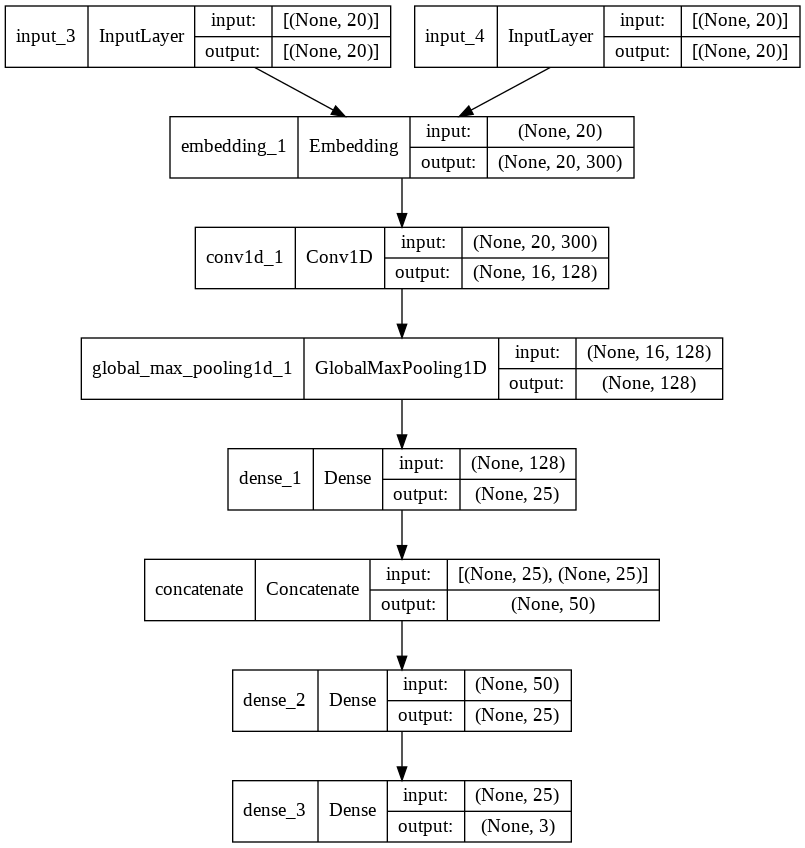

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model = my_model()
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007),metrics=['acc'])
modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=7)
history=model.fit([trainind1,trainind2],train_to_categorical,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint],epochs=20)

In [ ]:
f1_score(np.argmax(model.predict([trainind1,trainind2]),axis=-1),trainlabels,average="weighted")

In [ ]:
f1_score(np.argmax(model.predict([testind1,testind2]),axis=-1),testlabels,average="weighted")

#### In LOOP: all train and test domains

In [ ]:
train_domain='main-captions'
test_domain='main-captions'

In [ ]:

for train_domain in ['main-captions', 'main-forums', 'main-news']:
  d1={}
  z=[]
  print(train_domain)
  for test_domain in ['main-captions', 'main-forums', 'main-news']:
    #print(train_domain, test_domain)
    train[train["genre"]==train_domain]
    train_sentences1 = list(train[train["genre"]==train_domain]["sentence1"])
    train_sentences2 = list(train[train["genre"]==train_domain]["sentence2"])
    trainlabels = list(train[train["genre"]==train_domain]["label"])
    test_sentences1 = list(test[test["genre"]==test_domain]["sentence1"])
    test_sentences2 = list(test[test["genre"]==test_domain]["sentence2"])
    testlabels = list(test[test["genre"]==test_domain]["label"])
    np.mean([len(i.split(" ")) for i in train_sentences1 ]),np.mean([len(i.split(" ")) for i in train_sentences2 ])
    maxlen = 20
    maxwords = 30000
    embed_dim = 300
    tok = Tokenizer(num_words=maxwords)
    tok.fit_on_texts(train_sentences1+train_sentences2)
    word_index = tok.word_index
    embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
    for word, i in word_index.items():
        if word in embeddings_index:
            embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    train_seq1 = tok.texts_to_sequences(train_sentences1)
    trainind1 = pad_sequences(train_seq1,maxlen=maxlen)
    test_seq1 = tok.texts_to_sequences(test_sentences1)
    testind1 = pad_sequences(test_seq1,maxlen=maxlen)
    train_seq2 = tok.texts_to_sequences(train_sentences2)
    trainind2 = pad_sequences(train_seq2,maxlen=maxlen)
    test_seq2 = tok.texts_to_sequences(test_sentences2)
    testind2 = pad_sequences(test_seq2,maxlen=maxlen)
    train_to_categorical=to_categorical(trainlabels)
    test_to_categorical=to_categorical(testlabels)
    model = my_model()
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007),metrics=['acc'])
    modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=7)
    history=model.fit([trainind1,trainind2],train_to_categorical,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint,earlystop],epochs=20, verbose=0)##### VERBOSE FOR NOT PRINTING    
    d1[test_domain] = f1_score(np.argmax(model.predict([trainind1,trainind2]),axis=-1),trainlabels,average="weighted"),f1_score(np.argmax(model.predict([testind1,testind2]),axis=-1),testlabels,average="weighted")
    z.append(100* f1_score(np.argmax(model.predict([testind1,testind2]),axis=-1),testlabels,average="weighted"))
  print(d1)
  print(z)  
  print("\n=========================================\n")


In [ ]:
def my_model():
  I1=Input(shape=(maxlen,))
  I2=Input(shape=(maxlen,))
  embed_layer = Embedding(len(word_index)+1,embed_dim,weights=[embedding_matrix],trainable=False)
  conv_layer = Conv1D(128, 5, activation='relu')
  max_pool_layer = GlobalMaxPooling1D()
  dense_layer = Dense(25, activation='relu')
  r1 = embed_layer(I1)
  r2 = embed_layer(I2)

  c1 = conv_layer(r1)
  c2 = conv_layer(r2)

  c1 = max_pool_layer(c1)
  c2 = max_pool_layer(c2)

  c1 = dense_layer(c1)
  c2 = dense_layer(c2)
  subtracted =   keras.layers.Subtract()([c1, c2])
  #absvalue  = Dot(axes=1, normalize=True)([c1,c2])
  absvalue  = Lambda(lambda x: K.sqrt(K.sum(x**2,axis=-1)))(subtracted)
  o = Activation("sigmoid")(absvalue)
  o = Lambda(lambda x: 1-x))(subtracted)
  return Model(inputs=[I1,I2],outputs=[o])

In [ ]:
model = my_model()
model.summary()

In [ ]:
newtrainlabels = [0.5 if i == 1 else i for i in trainlabels]
newtrainlabels = np.array([1 if i == 2 else i for i in newtrainlabels])# from 0,1,2 to 0,0.5,1

In [ ]:
newtestlabels = [0.5 if i == 1 else i for i in testlabels]
newtestlabels = np.array([1 if i == 2 else i for i in newtestlabels])

In [ ]:
model = my_model()
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007),metrics=['mse'])
modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
history=model.fit([trainind1,trainind2],newtrainlabels,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint],epochs=40)